In [1]:
import sys
import tarfile
from scipy.io import loadmat
import glob
import numpy as np
import os
from shutil import copyfile,rmtree
import json

In [2]:
if sys.version_info[0] >= 3:
    from urllib.request import urlretrieve
else:
    from urllib import urlretrieve

In [3]:
def download_file(url, dest=None):
    if not dest:
        dest = os.path.join(data_path, url.split('/')[-1])
    urlretrieve(url,dest)

In [4]:
data_path = 'flower'

In [ ]:
if not os.path.exists(data_path):
    os.mkdir(data_path)
flowers_archive_path = os.path.join(data_path, '102flowers.tgz')
if not os.path.isfile(flowers_archive_path):
    print ('Downloading images...')
    download_file('http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz')
    tarfile.open(flowers_archive_path).extractall(path=data_path)

image_labels_path = os.path.join(data_path, 'imagelabels.mat')
if not os.path.isfile(image_labels_path):
    print('Downloading image labels...')
    download_file('http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat')

In [6]:
image_labels = loadmat(image_labels_path)['labels'][0]
image_labels -= 1

In [7]:
files = sorted(glob.glob(os.path.join(data_path,'jpg','*.jpg')))
labels = np.array([i for i in zip(files, image_labels)])

In [8]:
cwd = os.getcwd()

In [16]:
def move_files(dir_name,cwd,labels):
    cur_dir_path = os.path.join(cwd, dir_name)
    if not os.path.exists(cur_dir_path):
        os.mkdir(cur_dir_path)
    for i in range(0,102):
        class_dir  = os.path.join(cwd, dir_name, str(i))
        os.mkdir(class_dir)
    for label in labels:
        src = str(label[0])
        dst = os.path.join(cwd, dir_name, label[1], src.split(os.sep)[-1])
        copyfile(src,dst)

In [17]:
dir_name= os.path.join(data_path,'class')
move_files(dir_name,cwd,labels)

In [18]:
def save_dict(content,filename):
    content = dict(content)
    with open(filename,'w') as file_object:
        json.dump(content,file_object)

In [19]:
def load_dict(filename):
    with open(filename,'r') as file_object:
        content = json.load(file_object)
    return content

In [20]:
save_dict(labels, os.path.join(data_path,'image-label.json'))

In [21]:
!pip install fastai

In [24]:
from fastai.vision.all import *

data_path = 'flower'

# Define a function to get the image files
def get_image_files(path, folders=None):
    return get_files(path, extensions= '.jpg', recurse= True)

#Define the path to the folder containing the images (class folder)
image_folder_path = os.path.join(data_path,'class')

#Create a function to get the label from the image file path
def get_label(file_path):
    return int(file_path.parent.name)

In [ ]:
pip3 install --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cpu

C:\Users\nadan\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


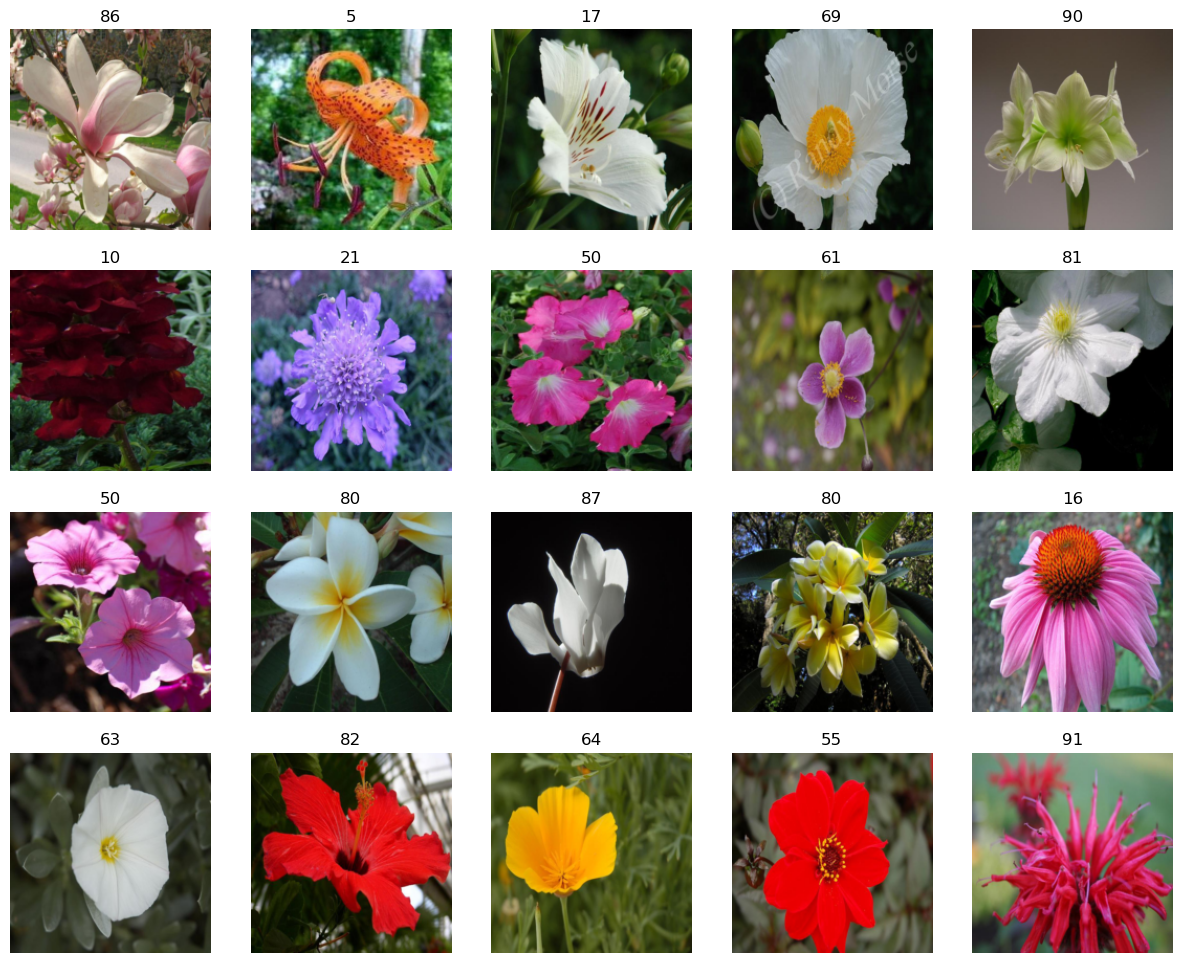

In [25]:
#DataBlock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(image_folder_path, bs=64)
dls.show_batch(max_n=20)

In [28]:
import os

data_path = 'flower' #Set data path
#Define the path to the folder containing images (Class folder)
image_folder_path = os.path.join(data_path,'class')
#create a dictionary to store the count of images in each class
class_counts = {}
#loop through each subdirectory (class folder) and count the number of images in each class
for class_dir in os.listdir(image_folder_path):
    class_id = int(class_dir) #Convert the class folder name to an integer (class ID)
    class_path = os.path.join(image_folder_path, class_dir)
    num_images = len(os.listdir(class_path)) #Count the number of images in the class folder
    class_counts[class_id] = num_images
    
#print the counts of images in each class
for class_id, count in class_counts.items():
    print(f"Class{class_id}: {count} images")

Class0: 40 images
Class1: 60 images
Class10: 87 images
Class100: 58 images
Class101: 48 images
Class11: 87 images
Class12: 49 images
Class13: 48 images
Class14: 49 images
Class15: 41 images
Class16: 85 images
Class17: 82 images
Class18: 49 images
Class19: 56 images
Class2: 40 images
Class20: 40 images
Class21: 59 images
Class22: 91 images
Class23: 42 images
Class24: 41 images
Class25: 41 images
Class26: 40 images
Class27: 66 images
Class28: 78 images
Class29: 85 images
Class3: 56 images
Class30: 52 images
Class31: 45 images
Class32: 46 images
Class33: 40 images
Class34: 43 images
Class35: 75 images
Class36: 108 images
Class37: 56 images
Class38: 41 images
Class39: 67 images
Class4: 65 images
Class40: 127 images
Class41: 59 images
Class42: 130 images
Class43: 93 images
Class44: 40 images
Class45: 196 images
Class46: 67 images
Class47: 71 images
Class48: 49 images
Class49: 92 images
Class5: 45 images
Class50: 258 images
Class51: 85 images
Class52: 93 images
Class53: 61 images
Class54: 71

In [ ]:
learn = vision_learner(dls, resnet50, metrics=F1Score(average="weighted"))
learn.fine_tune(30)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\nadan/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [01:36<00:00, 1.06MB/s]


epoch,train_loss,valid_loss,f1_score,time
0,2.394429,0.670862,0.821577,1:47:57


C:\Users\nadan\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,f1_score,time
0,0.508280,0.403054,0.901840,1:36:46


C:\Users\nadan\anaconda3\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
learn.export('model.pkl')

In [ ]:
learn = load_learner('model.pkl')

In [ ]:
is_this_zero_category,_,probs = learn.predict(PILImage.create('flower/class/0/image_06734.jpg'))
print(f"This is a: {is_this_zero_category}.")
print(f"Probability this is Zero Category: {probs[0]:.4f}")

In [ ]:
!pip install gradio

In [ ]:
from fastai.vision.all import *
import gradio as gr

def is_flower_category(x):
    return x[0].issuper()

In [ ]:
im= PILImage.create('flower/class/97/image_07751.jpg')
im= im.resize((192,192), resample= Image.LANCZOS)
im.show()

In [ ]:
learn.predict(im)

In [ ]:
categories = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
              21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
              61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,
              81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101)

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))


In [ ]:
image= gr.inputs.Image(shape=(192,192))
label=gr.outputs.Label()
examples= ['flower/class/97/image_07751.jpg','flower/class/19/image_04897.jpg',
           'flower/class/83/image_02553.jpg','flower/class/33/image_06930.jpg',
           'flower/class/79/image_01964.jpg','flower/class/90/image_04840.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)